# Data Understanding

Data understanding is the preliminary investigation of the data in order to better understand their specific characteristics. Data understanding consists of describing, exploring, and and identifying problems with the data.

## Summary Statistics

Summary statistics are the numbers that summarize properties of the data. Summarized properties include frequency, location, and spread. Most summary statistics can be calculated in a single pass through the data. There are many ways to obtain summary statistics for your data in Python.

Below, we will demonstrate how to obtain summary statistics using pandas and NumPy. First, we import both of these libraries:

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

Next, we generate two illustrative datasets from which we can generate summary statistics:

In [2]:
npvalues = np.random.randint(500, size=10000) # n-dimensional array (ndarray) of 10,000 random numbers in range [0-500)
pdvalues = pd.Series(np.random.randint(500, size=10000)) # pandas Series of 10,000 random numbers in range [0-500)

NumPy provides an *n*-dimensional array (`ndarray`) object that is a multidimensional container of items of the same type and size. Below, we show the first 10 elements represented as an `ndarray`, which is the default output of the above `nd.random.randint()` function.

In [3]:
npvalues[:10]

array([134,  64, 294, 387, 449, 344, 422, 346, 452, 344])

pandas Series are implemented as labeled `ndarrays`. Therefore, all of the statistical methods available to `ndarrays` can also be used with pandas `Series`. pandas `Series` also provide additional functionality, as we will show. Below, we show the first 10 elements represented as a pandas `Series`. We generated this representation by converting the default `ndarray` to a `Series` with the above `pd.Series()` function.

In [4]:
pdvalues[:10]

0    247
1    323
2    124
3    343
4     82
5    253
6    476
7    322
8     19
9    443
dtype: int64

Built-in methods are available for basic statistics. Some are demonstrated below:

In [5]:
print('MIN(npvalues) = ' + str(npvalues.min()) + '\t\t\tMIN(pdvalues) = ' + str(pdvalues.min())) # minimum value
print('MAX(npvalues) = ' + str(npvalues.max()) + '\t\t\tMAX(pdvalues) = ' + str(pdvalues.max())) # maximum value
print('RANGE(npvalues) = ' + str(npvalues.ptp()) + '\t\t\tRANGE(pdvalues) = ' + str(pdvalues.ptp())) # range
print('MEAN(npvalues) = ' + str(npvalues.mean()) + '\t\tMEAN(pdvalues) = ' + str(pdvalues.mean())) # mean
print('STD(npvalues) = ' + str(npvalues.std()) + '\t\tSTD(pdvalues) = ' + str(pdvalues.std())) # standard deviation
print('VARIANCE(npvalues) = ' + str(npvalues.var()) + '\tVARIANCE(pdvalues) = ' + str(pdvalues.var())) # variance

MIN(npvalues) = 0			MIN(pdvalues) = 0
MAX(npvalues) = 499			MAX(pdvalues) = 499
RANGE(npvalues) = 499			RANGE(pdvalues) = 499
MEAN(npvalues) = 249.3047		MEAN(pdvalues) = 250.5713
STD(npvalues) = 144.47203971		STD(pdvalues) = 144.36677627806165
VARIANCE(npvalues) = 20872.1702579	VARIANCE(pdvalues) = 20841.766092919905


Additionally, pandas `Series` have a method called `describe()` that returns a convenient summary of these basic statistics.

In [6]:
pdvalues.describe()

count    10000.000000
mean       250.571300
std        144.366776
min          0.000000
25%        127.000000
50%        249.000000
75%        376.000000
max        499.000000
dtype: float64

For non-numerical series objects, `describe()` will return a simple summary of the number of unique values and most frequently occurring ones.

In [7]:
s = pd.Series(['a', 'a', 'b', 'b', 'a', 'a', np.nan, 'c', 'd', 'a'])
s.describe()

count     9
unique    4
top       a
freq      5
dtype: object

*np.nan* is used to denote missing values. By default, the statistical methods implemented in pandas (both for a  `Series` and `DataFrame`) skip these values, which is not always the case when we are dealing with an `ndarray`. This behavior can be altered by including the *skipna=False* flag when calling a method.

## Handling missing data with pandas

pandas provides extensive support for missing data. For full documentation, [consult this webpage](http://pandas.pydata.org/pandas-docs/dev/missing_data.html).

Below are a few examples of how to work with missing data using pandas. First, we create a pandas `DataFrame` with 5 rows and 3 columns. We then fill the `DataFrame` with random numbers:

In [8]:
df = pd.DataFrame(np.random.randn(5, 3), index=['a', 'c', 'e', 'f', 'h'], columns=['one', 'two', 'three'])
print(df)

        one       two     three
a  0.537996 -1.028772  0.504813
c -2.622665 -1.279252  0.837239
e -0.646190 -1.390452 -0.504833
f  0.169753  0.976576  0.303921
h  1.529208  0.557712 -1.428364


Next, we add two more columns, named 'four' and 'five':

In [9]:
df['five'] = df['one'] > 0
df['awesome'] = 'bar'
print(df)

        one       two     three   five awesome
a  0.537996 -1.028772  0.504813   True     bar
c -2.622665 -1.279252  0.837239  False     bar
e -0.646190 -1.390452 -0.504833  False     bar
f  0.169753  0.976576  0.303921   True     bar
h  1.529208  0.557712 -1.428364   True     bar


Adding new rows is also simple. Below we include three extra empty rows:

In [10]:
df2 = df.reindex(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h'])
print(df2)

        one       two     three   five awesome
a  0.537996 -1.028772  0.504813   True     bar
b       NaN       NaN       NaN    NaN     NaN
c -2.622665 -1.279252  0.837239  False     bar
d       NaN       NaN       NaN    NaN     NaN
e -0.646190 -1.390452 -0.504833  False     bar
f  0.169753  0.976576  0.303921   True     bar
g       NaN       NaN       NaN    NaN     NaN
h  1.529208  0.557712 -1.428364   True     bar


This is one way to index a column in pandas:

In [11]:
df['one']

a    0.537996
c   -2.622665
e   -0.646190
f    0.169753
h    1.529208
Name: one, dtype: float64

This is one way to index a row in pandas:

In [12]:
df2.loc['a']

one        0.537996
two        -1.02877
three      0.504813
five           True
awesome         bar
Name: a, dtype: object

pandas has two functions, `isnull()` and `notnull()`, that return boolean objects when called:

In [13]:
pd.isnull(df2['one'])

a    False
b     True
c    False
d     True
e    False
f    False
g     True
h    False
Name: one, dtype: bool

In [14]:
pd.notnull(df2['one'])

a     True
b    False
c     True
d    False
e     True
f     True
g    False
h     True
Name: one, dtype: bool

Missing values propagate naturally through arithmetic operations between pandas objects.

In [15]:
a = df[['one','two']]
a['one']['a':'e'] = float('nan')
print(a)

        one       two
a       NaN -1.028772
c       NaN -1.279252
e       NaN -1.390452
f  0.169753  0.976576
h  1.529208  0.557712


/Users/reidjohnson/anaconda/lib/python3.5/site-packages/pandas/core/series.py:720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._set_with(key, value)
/Users/reidjohnson/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:3066: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [16]:
b = df[['one','two','three']]
print(b)

        one       two     three
a  0.537996 -1.028772  0.504813
c -2.622665 -1.279252  0.837239
e -0.646190 -1.390452 -0.504833
f  0.169753  0.976576  0.303921
h  1.529208  0.557712 -1.428364


In [17]:
print(a + b)

        one  three       two
a       NaN    NaN -2.057544
c       NaN    NaN -2.558504
e       NaN    NaN -2.780903
f  0.339507    NaN  1.953152
h  3.058415    NaN  1.115424


In [18]:
a = a['one'].dropna()
print(a)

f    0.169753
h    1.529208
Name: one, dtype: float64


In pandas, summary statistics all account for missing values. 
*   When summing data, `NaN` (missing) values will be treated as zero.
*   If the data are all `NaN`, the result will be `NaN`.
*   Methods like `cumsum()` and `cumprod()` ignore `NaN` values, but preserve them in the resulting arrays.

*This is just the bare minimum. pandas has more functionality for working with missing data.*

## Histograms

### Using pandas

Plotting histograms using pandas is quite straightforward. Using the above pandas `Series`, we can simply call the `hist()` method.

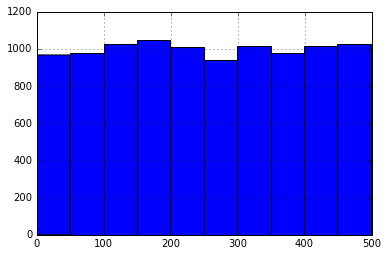

In [19]:
pdhist = pdvalues.hist()

Parameters can be used to change the number of bins, color, transparency, etc.

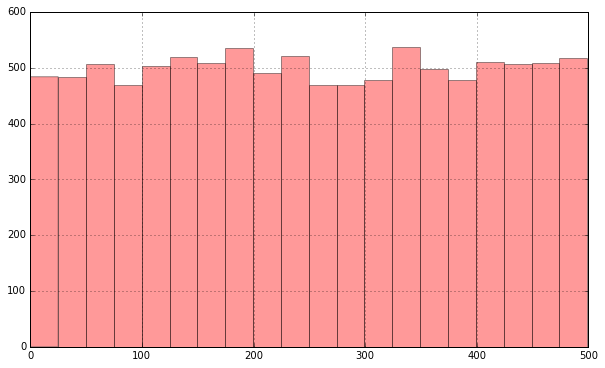

In [20]:
pdhist2 = pdvalues.hist(bins=20, color='r', alpha=0.4, figsize=(10,6))

### Using NumPy + matplotlib

pandas can produce visualizations directly by using or "wrapping" matplotlib, a popular plotting library for Python. This means that when we plot a histogram using pandas, pandas is actually using the `hist()` method of matplotlib to produce this plot. We can of course achieve the same result by performing that call on our `ndarray` directly from matplotlib.

To do this, we first have to import matplotlib.

In [21]:
import matplotlib.pyplot as plt # required for plotting

Next, we call the `hist()` method of matplotlib, with our `ndarray` as input:

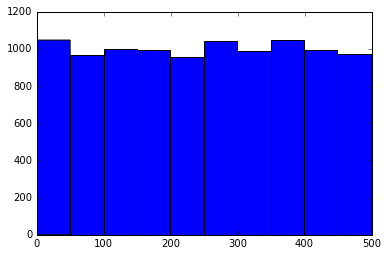

In [22]:
nphist = plt.hist(npvalues)

## Boxplots

### Using pandas

The pandas `DataFrame` has a boxplot method that allows you to visualize the distribution of values within each column.

In [23]:
df = pd.DataFrame(np.random.rand(10,2), columns=['Col1', 'Col2'])
print(df.head())

       Col1      Col2
0  0.411712  0.630651
1  0.431132  0.381446
2  0.597433  0.238762
3  0.460534  0.409807
4  0.815123  0.511928


/Users/reidjohnson/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


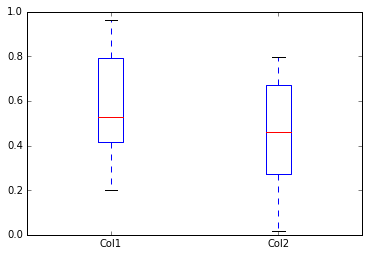

In [24]:
box = df.boxplot(grid=False)

### Using NumPy + matplotlib

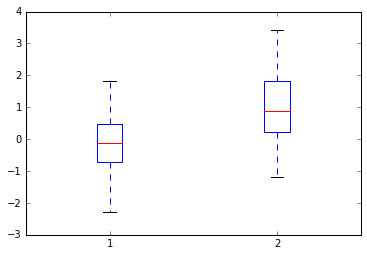

In [25]:
fig = plt.figure()
ax = fig.add_subplot(111)

x1 = np.random.normal(0,1,50)
x2 = np.random.normal(1,1,50)

npbox = ax.boxplot([x1,x2])

## Scatterplots

### Using pandas

Let's define a `DataFrame` containing 2 columns, each with 200 random numbers < 1.

In [26]:
df = pd.DataFrame(np.random.rand(200,2))

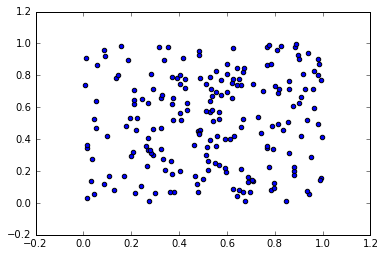

In [27]:
pdscatter = plt.scatter(df[0], df[1])

### Using NumPy + matplotlib

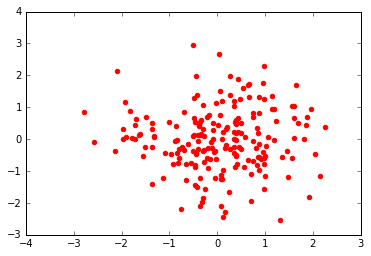

In [28]:
x = np.random.randn(200)
y = np.random.randn(200)

fig = plt.figure()
ax = fig.add_subplot(111)

npscatter = ax.scatter(x,y,color='r')

*Let's look at some data understanding and visualization on an actual set of data.*

In [29]:
df_births = pd.read_csv('https://raw.githubusercontent.com/jakevdp/PythonDataScienceHandbook/master/notebooks/data/births.csv')
print(df_births.head())

   year  month day gender  births
0  1969      1   1      F    4046
1  1969      1   1      M    4440
2  1969      1   2      F    4454
3  1969      1   2      M    4548
4  1969      1   3      F    4548


We can make a histogram of the births:

(array([ 15067.,      0.,      0.,      0.,      0.,      0.,      0.,
            75.,    333.,     72.]),
 array([  1.00000000e+00,   1.99631000e+04,   3.99252000e+04,
          5.98873000e+04,   7.98494000e+04,   9.98115000e+04,
          1.19773600e+05,   1.39735700e+05,   1.59697800e+05,
          1.79659900e+05,   1.99622000e+05]),
 <a list of 10 Patch objects>)

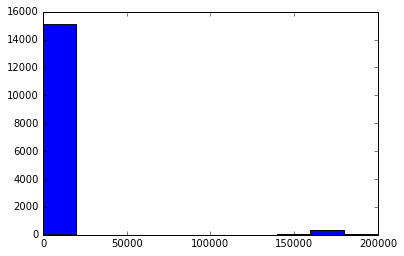

In [30]:
plt.hist(df_births['births'], 10)

We can actually get the counts and borders of the bins for the histogram. We can use these values to determine which bin each row belongs in, creating a new column for this value:

In [31]:
# Determine the number of bins and their boundaries.
n, bins = np.histogram(df_births['births'].dropna(), 10)
df_births['births_binned'] = pd.Series(np.digitize(df_births['births'], bins), index=df_births.index)
print(df_births.head())

   year  month day gender  births  births_binned
0  1969      1   1      F    4046              1
1  1969      1   1      M    4440              1
2  1969      1   2      F    4454              1
3  1969      1   2      M    4548              1
4  1969      1   3      F    4548              1


We can use the cross-tabulation function to aggregate the count of births in each bin according to gender. We can then compute the ratio of these counts according to gender:

In [32]:
# Cross-tabulate the births and gender.
df = pd.crosstab(df_births['births_binned'], df_births['gender'], margins=True).reset_index()
df['ratio'] = df['F'] / df['M']
print(df)

gender births_binned     F     M    All     ratio
0                  1  7536  7531  15067  1.000664
1                  8    58    17     75  3.411765
2                  9   169   164    333  1.030488
3                 10    13    58     71  0.224138
4                 11     0     1      1  0.000000
5                All  7776  7771  15547  1.000643


We can use quantile-based discretization to retrieve the borders of equal-frequency bins. We can then plot the histogram of births using the border of these bins:

[  1.00000000e+00   3.00000000e+00   1.20000000e+01   3.37914000e+03
   3.62100000e+03   3.71600000e+03   3.79100000e+03   3.86100000e+03
   3.90800000e+03   3.95300000e+03   4.00460000e+03   4.04100000e+03
   4.07400000e+03   4.10200000e+03   4.12844000e+03   4.15200000e+03
   4.17600000e+03   4.19800000e+03   4.22128000e+03   4.24300000e+03
   4.26200000e+03   4.28400000e+03   4.30300000e+03   4.32200000e+03
   4.34000000e+03   4.35800000e+03   4.37600000e+03   4.39400000e+03
   4.41500000e+03   4.43034000e+03   4.44900000e+03   4.46800000e+03
   4.48400000e+03   4.50118000e+03   4.51800000e+03   4.53600000e+03
   4.55556000e+03   4.57300000e+03   4.59000000e+03   4.60700000e+03
   4.62200000e+03   4.64100000e+03   4.65700000e+03   4.67600000e+03
   4.70000000e+03   4.71500000e+03   4.73700000e+03   4.75800000e+03
   4.77600000e+03   4.79600000e+03   4.81400000e+03   4.83500000e+03
   4.85400000e+03   4.87300000e+03   4.89384000e+03   4.91200000e+03
   4.93200000e+03   4.95000000e+03

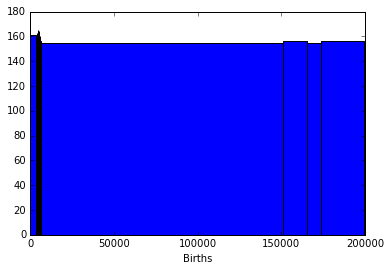

In [33]:
numbins = 100
bins = pd.qcut(df_births['births'], numbins, retbins=True)[1]

print(bins)

# Generate a histogram with equal-frequency bins.
plt.hist(df_births['births'], bins, range=(bins.min(),bins.max())) # matplotlib hist function
plt.xlabel('Births') # x-axis label
plt.show() # non-overlapping plots

# US Baby Names 1880-2015

The following datasets ([download here](http://www.ssa.gov/oact/babynames/limits.html)) contain a list of the most frequent names given to newborn babies in the United States each year.
There are many things you might want to do with the dataset:

* Visualize the proportion of babies given a particular name (your own, or another name) over time.
* Determine the relative rank of a name.
* Determine the most popular names in each year or the names with largest increases or decreases.
* Analyze trends in names: vowels, consonants, length, overall diversity, changes in spelling, first and last letters.
* Analyze external sources of trends: biblical names, celebrities, demographic changes.

Modified from "Python for Data Analysis" by Wes McKinney.

Let's first open a single file and take a look at it:

In [34]:
names1880 = pd.read_csv('https://raw.githubusercontent.com/cse44648/cse44648/master/datasets/baby-names/yob1880.txt', \
                        names=['name', 'sex', 'births'])

In [35]:
names1880[:5]

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746


Since we have numerous data files, the following snippet combines all of these data into a single pandas `DataFrame` and adds a *year* field.

In [36]:
years = range(1880, 2015)
pieces = []
columns = ['name', 'sex', 'births']

for year in years:
    path = 'https://raw.githubusercontent.com/cse44648/cse44648/master/datasets/baby-names/yob%d.txt' % year
    frame = pd.read_csv(path, names=columns)
    frame['year'] = year
    pieces.append(frame)

# Concatenate everything into a single DataFrame.
names = pd.concat(pieces, ignore_index=True)

In [37]:
names[:5]

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


We can now perform several types of aggregation. For example, let's create a new `DataFrame` containing the total number of births per year, split by sex.

In [38]:
total_births = names.pivot_table('births', index='year', columns='sex', aggfunc=sum)

In [39]:
total_births.head()

sex,F,M
year,,
1880,90992,110490
1881,91953,100743
1882,107848,113686
1883,112318,104627
1884,129020,114443


Using the `plot()` function, we can very quickly draw a figure to illustrate this `DataFrame`.

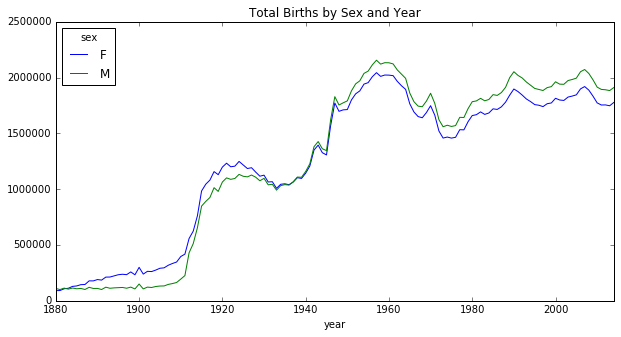

In [40]:
total_births.plot(figsize=(10,5), title='Total Births by Sex and Year')

Now suppose we would like to analyze how frequently the names *John*, *Mary*, *Pamela*, *Reid*, *Thomas*, and *Katricia* occurr over time.

First we redefine *total_births*, this time aggregating data by *name* rather than *sex*. We then retrieve the subset of names that we are interested in and plot them.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1223a5198>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x11e020588>], dtype=object)

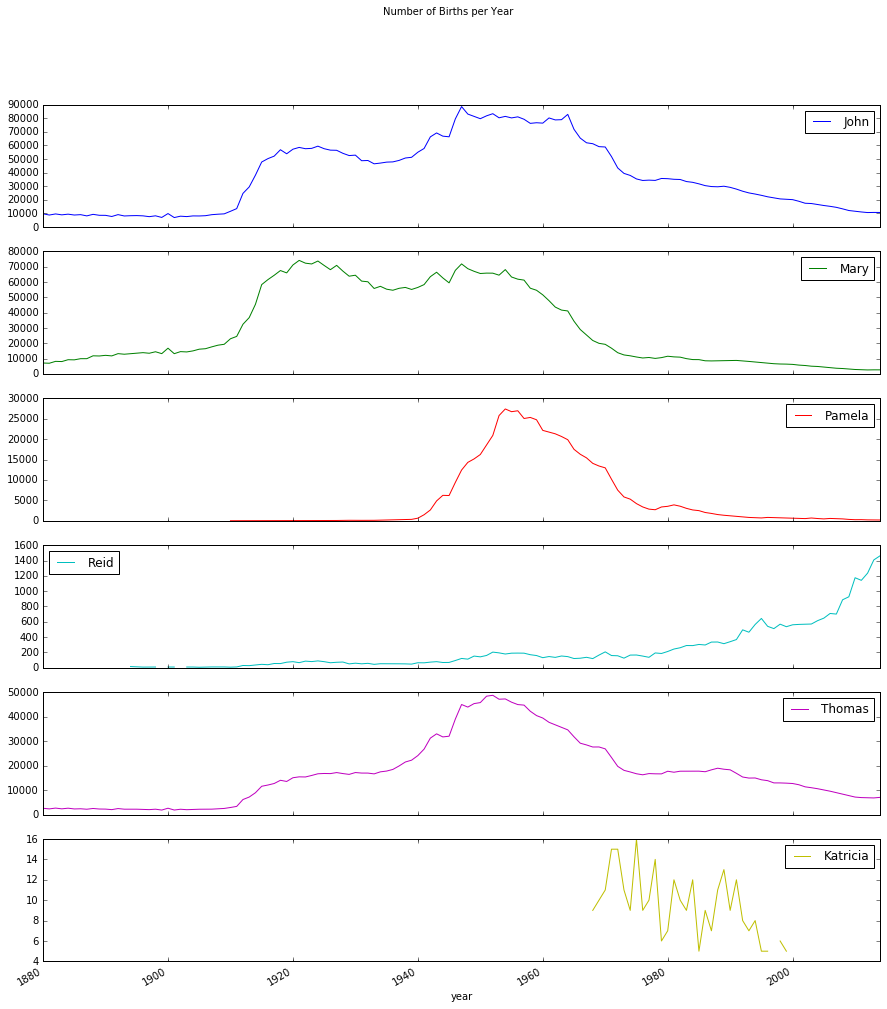

In [41]:
total_births = names.pivot_table('births', index='year', columns='name', aggfunc=sum)
subset = total_births[['John', 'Mary', 'Pamela', 'Reid', 'Thomas', 'Katricia']]
subset.plot(subplots=True, figsize=(15, 17), grid=False, title="Number of Births per Year")

We can also look at how the distribution of boy names by final letter has changed over the last 100 years. To see this, we first aggregate all of the births in the full dataset by year, sex, and final letter.

In [42]:
# Extract last letter from name column.
get_last_letter = lambda x: x[-1:]
last_letters = names.name.map(get_last_letter)
last_letters.name = 'last_letter'
table = names.pivot_table('births', index=last_letters, columns=['sex', 'year'], aggfunc=sum)

Then we select a few representative years, spanning 100 years in total:

In [43]:
subtable = table.reindex(columns=[1912, 1962, 2012], level='year')
subtable.head()

sex               F                      M                
year           1912    1962    2012   1912    1962    2012
last_letter                                               
a            149176  682522  653759   1655    5335   27167
b               NaN     459     471    923    3458   34654
c               NaN      73    1235   1053   17877   24237
d             10523    3671    2522  54090  250020   42407
e            180521  424775  320149  54716  164974  128269

Further, we normalize the table by the number of births, so as to obtain the proportion of total births for each sex ending in each letter:

In [44]:
letter_prop = subtable / subtable.sum().astype(float)
letter_prop.head()

sex                 F                             M                    
year             1912      1962      2012      1912      1962      2012
last_letter                                                            
a            0.267286  0.347055  0.372458  0.003849  0.002579  0.014367
b                 NaN  0.000233  0.000268  0.002147  0.001671  0.018327
c                 NaN  0.000037  0.000704  0.002449  0.008641  0.012818
d            0.018855  0.001867  0.001437  0.125806  0.120844  0.022427
e            0.323449  0.215993  0.182395  0.127262  0.079738  0.067835

With the letter proportions now in hand, we can make bar plots for each sex broken-down by year.

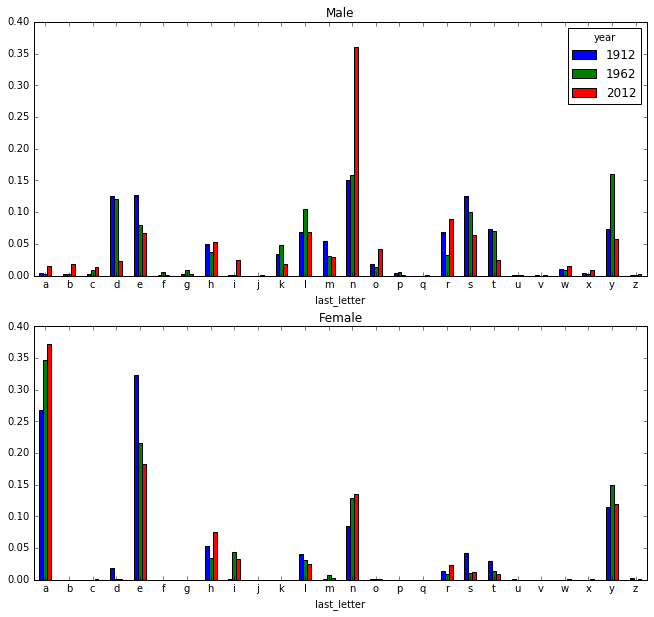

In [45]:
fig, axes = plt.subplots(2, 1, figsize=(11, 10))
letter_prop['M'].plot(kind='bar', rot=0, ax=axes[0], title='Male')
letter_prop['F'].plot(kind='bar', rot=0, ax=axes[1], title='Female', legend=False)